In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Packages for Linear Regression:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Checking Data

In [4]:
input_path= r"C:/Users/hpakki/Desktop/migration/Assignment 3/"
data = pd.read_csv(input_path + 'CarPrice_Assignment.csv', low_memory= False)

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [412]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [414]:
data.shape

(205, 26)

## Data Cleaning

In [7]:
#Here, car_ID is irrelevant in car pricing, hence the column is being dropped
data.drop('car_ID',axis=1,inplace=True)

## Functions for Plotting

In [8]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [9]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

In [10]:
def plot_cat(var_list):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car_data)
    plt.show()

In [11]:
def plot_dist(var_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        
    plt.show()


## Data Analysis

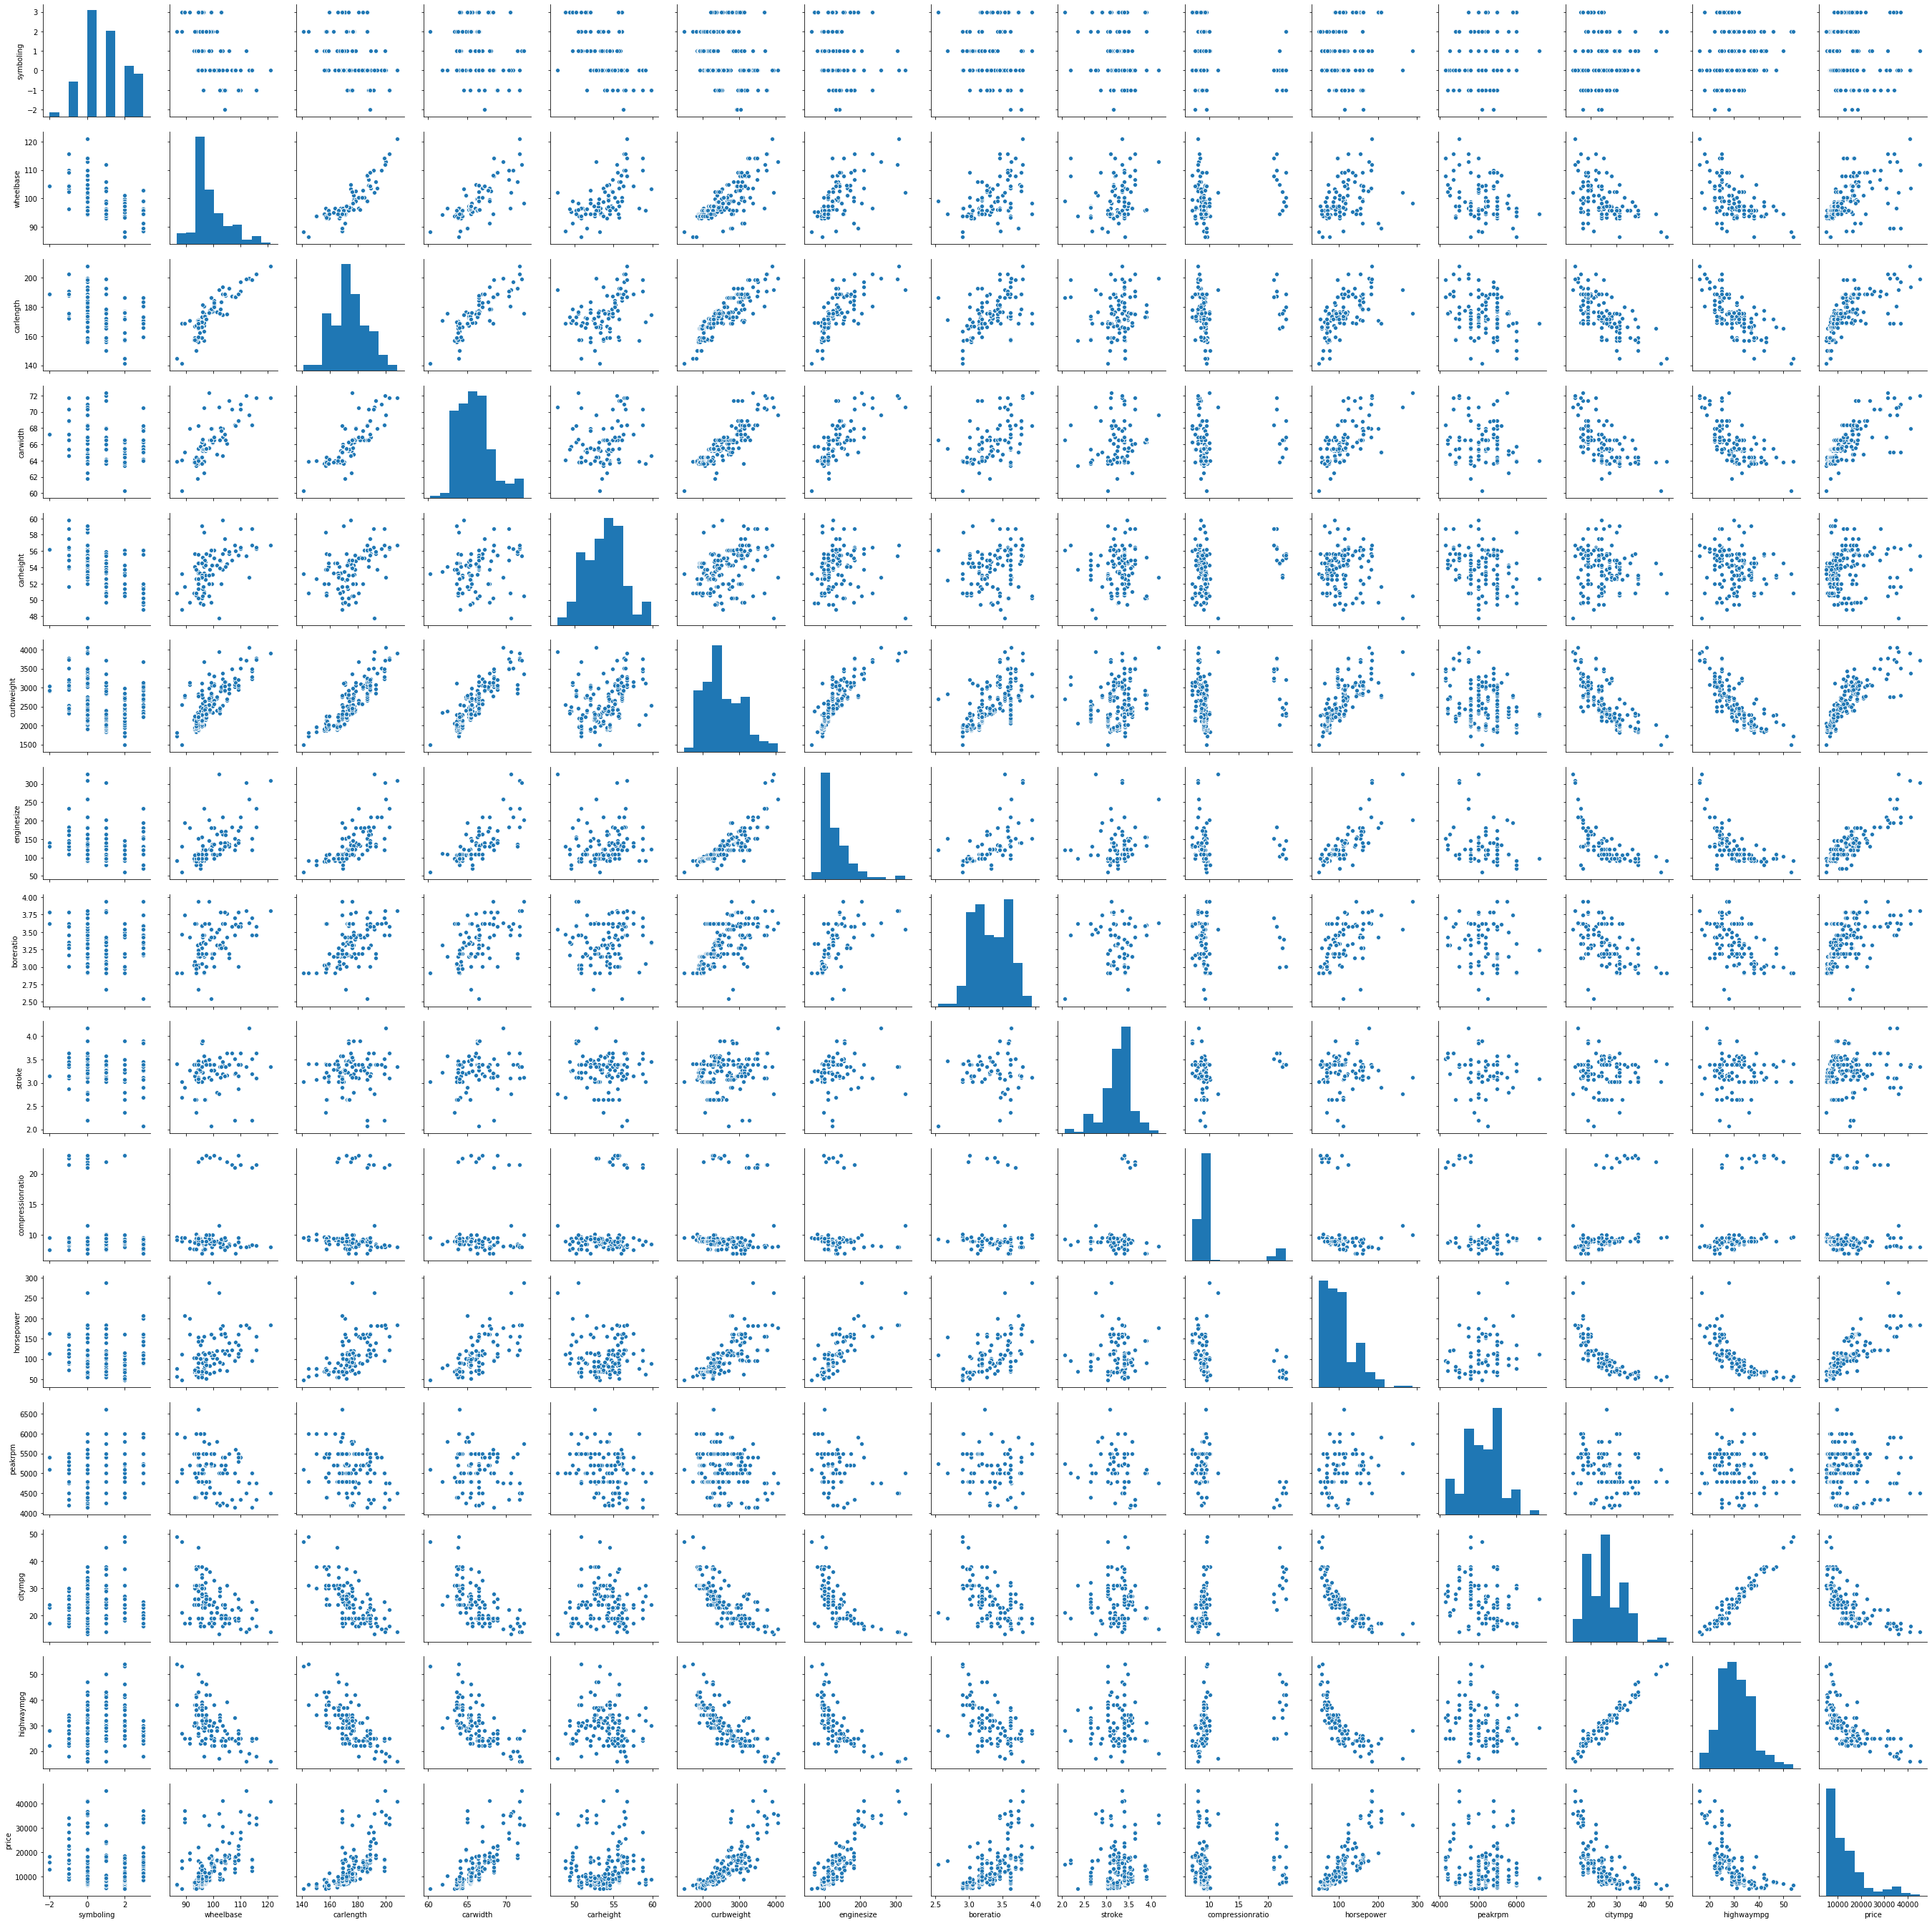

In [323]:
sns.pairplot(data)
plt.show()

## Correlation heat map of variables in the dataset

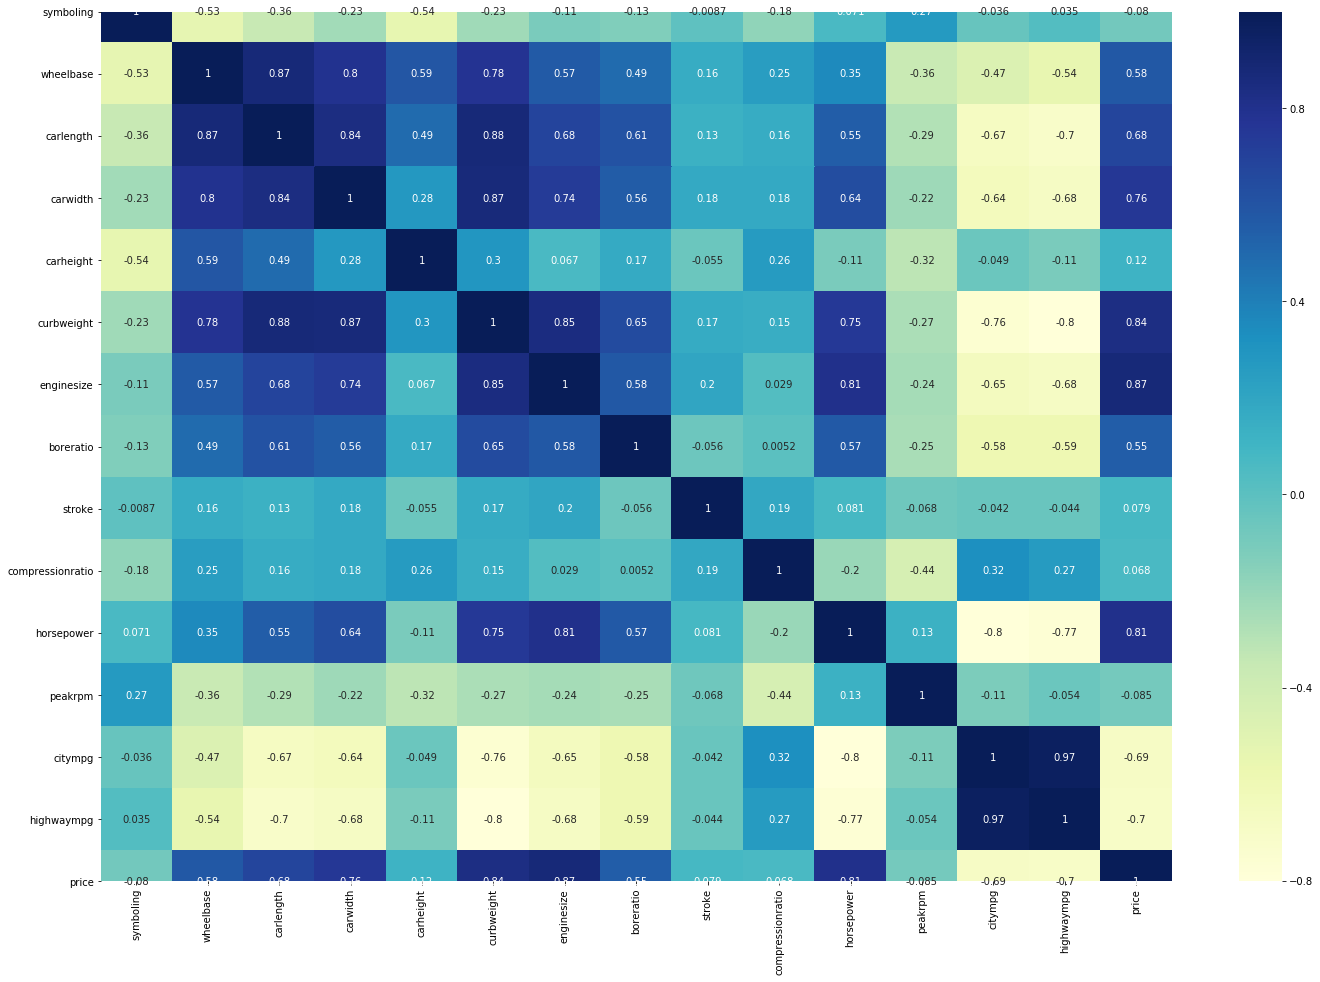

In [12]:
plt.figure(figsize = (24, 16))
cor=data.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

## Converting categorical variable to binary form

In [13]:
data['symboling'] = data['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [14]:
data['car_company'] = data['CarName'].apply(lambda x: x.split( )[0])
data.drop('CarName',axis=1,inplace=True)

In [15]:
#Checking for unique car companies in the dataset
data['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
# Correcting the misspelled company names.
data['car_company'].replace('maxda','mazda',inplace=True)
data['car_company'].replace('Nissan','nissan',inplace=True)
data['car_company'].replace('porcshce','porsche',inplace=True)
data['car_company'].replace('toyouta','toyota',inplace=True)
data['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [17]:
categorical_variables = list(data.columns[data.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

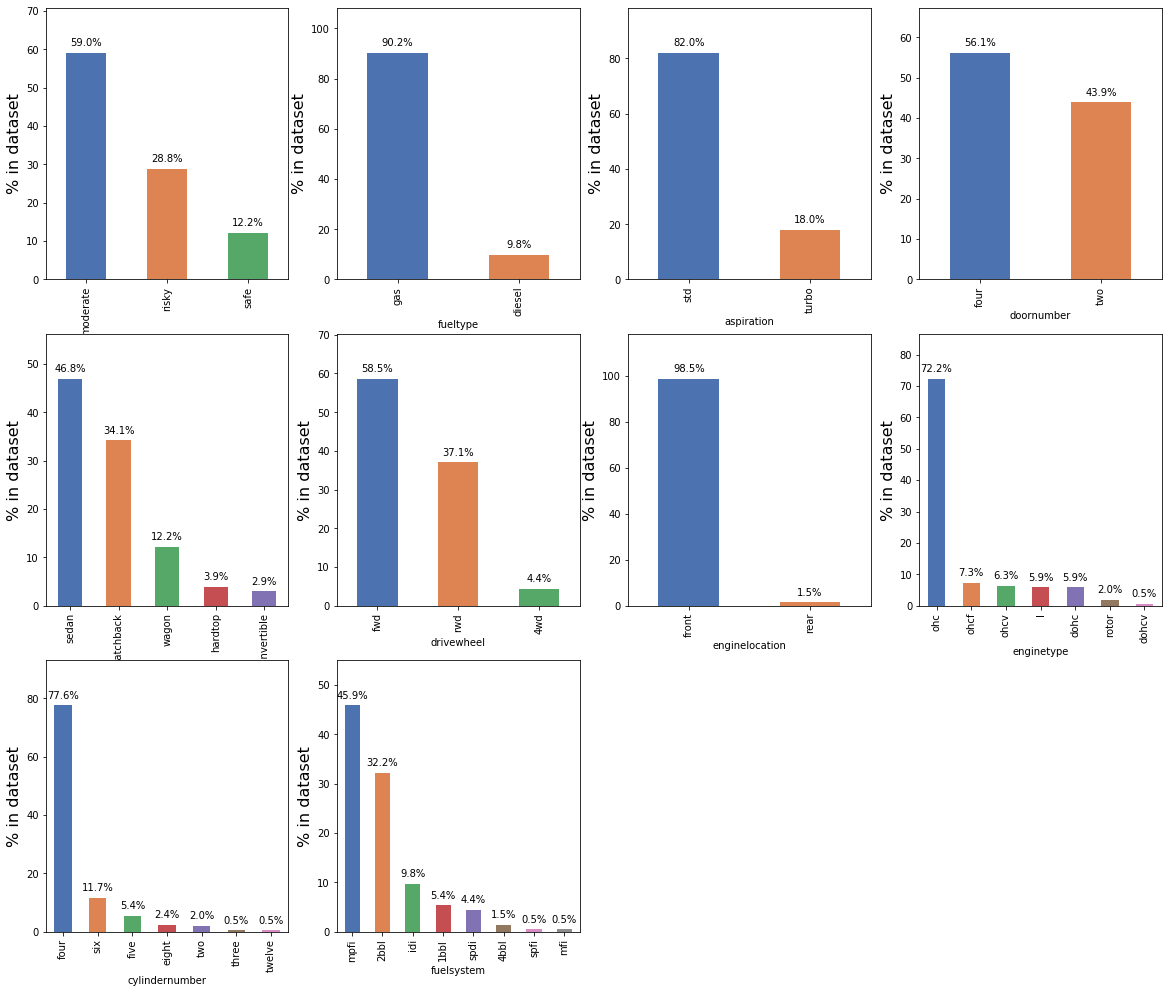

In [18]:
# market percentage of car's with respect to features
plot_percentages(data,categorical_variables[:-1])

<Figure size 1728x1152 with 0 Axes>

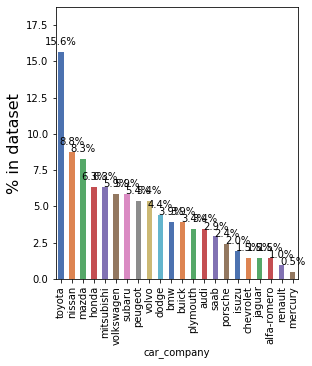

In [19]:
#Company market share according to Sales:
plt.figure(figsize = (24, 16))
plot_percentages(data,[categorical_variables[-1]])
plt.show()

NameError: name 'car_data' is not defined

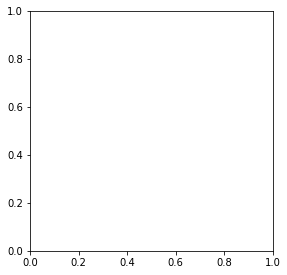

In [20]:
# ploting all variables excluding car_company against the output variable
plot_cat(categorical_variables[:-1])

## Binning car companies

In [21]:
company_segment_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
data['company_segment'] = data['car_company'].map(company_segment_dict)
# Dropping the orignal car_company variable
data.drop('car_company',axis=1,inplace=True)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midtier
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midtier


In [22]:
# Converting categorical variables with two levels to either 1 or 0
data['fueltype'] = data['fueltype'].map({'gas': 1, 'diesel': 0})
data['aspiration'] = data['aspiration'].map({'std': 1, 'turbo': 0})
data['doornumber'] = data['doornumber'].map({'two': 1, 'four': 0})
data['enginelocation'] = data['enginelocation'].map({'front': 1, 'rear': 0})
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_segment
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midtier
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midtier
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midtier
3,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midtier
4,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midtier


In [23]:
# Creating new variable carLWratio
data['carLWratio'] = data.carlength/data.carwidth
# Creating new variable carWHratio
data['carWHratio'] = data.carwidth/data.carheight
# Creating new variable PWratio
data['PWratio'] = data.horsepower/data.curbweight
# Creating new variable HCmpgratio
data['HCmpgratio'] = data.highwaympg/data.citympg
## droping the orignal variables
data.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)


In [24]:
# Creating dummy variables
df = pd.get_dummies(data)
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl'
         ],axis=1,inplace=True)
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'carLWratio', 'carWHratio', 'PWratio',
       'HCmpgratio', 'symboling_moderate', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_hightier', 'company_segment_lowtier',
       'company_segment_midtier'],
      dtype='object')

## Test and Train Split

In [25]:
from sklearn.model_selection import train_test_split

# Splitting the avilable data into training and testing set.

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling Numeric Variables

In [26]:
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_lowtier,company_segment_midtier
122,1,1,0,1,0.244828,0.272692,0.139623,0.230159,0.525253,0.15000,...,1,0,0,0,0,0,0,0,1,0
125,1,1,1,1,0.272414,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,1,0,0,1,0,0
166,1,1,1,1,0.272414,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,1,0,0,0,1,0
1,1,1,1,1,0.068966,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,1,0,0,0,0,1
199,1,0,0,1,0.610345,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,1,0,0,0,0,1


In [28]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_lowtier,company_segment_midtier
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,0.411141,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.118881,0.447552,0.412587
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.324786,0.498989,0.494030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.341379,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.559542,0.301887,0.682540,0.611111,0.150000,...,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


## Dividing into X and Y sets for the model building

In [29]:
y_train = df_train.pop('price')
X_train = df_train

## Functions for Building Model

In [30]:
def getVIF(X_train):
    #X_train = df.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [31]:
def fit_LRM(X_train):
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

## Building Model

In [32]:
#Using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 9),
 ('doornumber', False, 28),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 15),
 ('horsepower', True, 1),
 ('peakrpm', False, 6),
 ('carLWratio', False, 13),
 ('carWHratio', True, 1),
 ('PWratio', True, 1),
 ('HCmpgratio', False, 20),
 ('symboling_moderate', False, 26),
 ('symboling_safe', False, 16),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 27),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 25),
 ('drivewheel_fwd', False, 22),
 ('drivewheel_rwd', False, 29),
 ('enginetype_dohc', False, 12),
 ('enginetype_dohcv', True, 1),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 7),
 ('enginetype_ohcv', False, 23),
 ('enginetype_rotor', False, 17),
 ('cylindernumber_eight', False, 4),
 ('cylindernumber_five', False, 3),
 ('cylindernumber_four', True, 1),
 ('cylindern

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'wheelbase', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'carWHratio', 'PWratio',
       'carbody_convertible', 'enginetype_dohcv', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve',
       'company_segment_hightier'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['aspiration', 'doornumber', 'stroke', 'compressionratio', 'peakrpm',
       'carLWratio', 'HCmpgratio', 'symboling_moderate', 'symboling_safe',
       'carbody_hardtop', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_segment_lowtier',
       'company_segment_midtier'],
      dtype='object')

## Building the Model using Statsmodel for detailed Stats:

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
lm=fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.68e-70
Time:                        22:15:07   Log-Likelihood:                 219.73
No. Observations:                 143   AIC:                            -407.5
Df Residuals:                     127   BIC:                            -360.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [39]:
getVIF(X_train_rfe)

,Features,VIF
6,horsepower,325.94
8,PWratio,213.65
3,curbweight,174.10
1,enginelocation,108.79
4,enginesize,39.70
2,wheelbase,26.51
0,fueltype,18.44
7,carWHratio,16.32
5,boreratio,15.62
11,cylindernumber_four,12.52


In [40]:
X_train1 = X_train_rfe.drop('boreratio', axis=1) #p val> 0.05

In [43]:
lm=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.84e-71
Time:                        22:15:34   Log-Likelihood:                 219.39
No. Observations:                 143   AIC:                            -408.8
Df Residuals:                     128   BIC:                            -364.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [42]:
getVIF(X_train1)

,Features,VIF
5,horsepower,325.64
7,PWratio,212.08
3,curbweight,167.20
1,enginelocation,107.29
4,enginesize,39.32
2,wheelbase,26.51
0,fueltype,18.43
6,carWHratio,16.30
10,cylindernumber_four,10.87
11,cylindernumber_six,3.59


In [46]:
#Dropping enginesize
X_train2 = X_train1.drop('enginesize', axis=1)

In [47]:
lm=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.82e-72
Time:                        22:17:05   Log-Likelihood:                 218.30
No. Observations:                 143   AIC:                            -408.6
Df Residuals:                     129   BIC:                            -367.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [48]:
getVIF(X_train2)

,Features,VIF
4,horsepower,299.33
6,PWratio,197.61
3,curbweight,166.59
1,enginelocation,106.01
2,wheelbase,26.34
0,fueltype,18.42
5,carWHratio,15.46
9,cylindernumber_four,9.67
10,cylindernumber_six,2.78
8,enginetype_dohcv,2.34


In [49]:
#Dropping carWHratio
X_train3=X_train2.drop('carWHratio', axis=1)

In [50]:
lm=fit_LRM(X_train3) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     166.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           9.37e-73
Time:                        22:17:16   Log-Likelihood:                 216.98
No. Observations:                 143   AIC:                            -408.0
Df Residuals:                     130   BIC:                            -369.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [51]:
getVIF(X_train3)

,Features,VIF
4,horsepower,299.15
5,PWratio,194.72
3,curbweight,166.35
1,enginelocation,96.02
2,wheelbase,25.74
0,fueltype,18.09
8,cylindernumber_four,9.34
9,cylindernumber_six,2.66
7,enginetype_dohcv,2.33
10,cylindernumber_twelve,2.09


In [52]:
#Dropping HP as VIF is high
X_train4=X_train3.drop('horsepower', axis=1)
lm=fit_LRM(X_train4)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     150.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.02e-68
Time:                        22:17:22   Log-Likelihood:                 203.90
No. Observations:                 143   AIC:                            -383.8
Df Residuals:                     131   BIC:                            -348.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [54]:
getVIF(X_train4)

,Features,VIF
1,enginelocation,36.28
3,curbweight,31.92
2,wheelbase,25.19
0,fueltype,17.81
4,PWratio,15.71
7,cylindernumber_four,8.53
8,cylindernumber_six,2.52
10,company_segment_hightier,1.93
6,enginetype_dohcv,1.46
5,carbody_convertible,1.37


In [55]:
X_train5=X_train4.drop('cylindernumber_twelve',axis=1) #Since p > 0.05

In [56]:
lm=fit_LRM(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     166.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           8.35e-70
Time:                        22:18:12   Log-Likelihood:                 203.81
No. Observations:                 143   AIC:                            -385.6
Df Residuals:                     132   BIC:                            -353.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [57]:
X_train6=X_train5.drop('cylindernumber_six',axis=1) #Since p > 0.05

In [58]:
lm=fit_LRM(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           9.75e-71
Time:                        22:18:26   Log-Likelihood:                 203.27
No. Observations:                 143   AIC:                            -386.5
Df Residuals:                     133   BIC:                            -356.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [59]:
X_train7=X_train6.drop('enginetype_dohcv',axis=1) #Since p > 0.05

In [60]:
lm=fit_LRM(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     208.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.11e-71
Time:                        22:18:55   Log-Likelihood:                 202.70
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     134   BIC:                            -360.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [61]:
getVIF(X_train7)

,Features,VIF
1,enginelocation,36.19
3,curbweight,30.13
2,wheelbase,24.30
0,fueltype,16.73
4,PWratio,12.58
6,cylindernumber_four,6.73
7,company_segment_hightier,1.85
5,carbody_convertible,1.32


In [64]:
X_train8=X_train7.drop('fueltype',axis=1) #p val >0.05

In [65]:
lm=fit_LRM(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     234.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.58e-72
Time:                        22:20:46   Log-Likelihood:                 201.30
No. Observations:                 143   AIC:                            -386.6
Df Residuals:                     135   BIC:                            -362.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [66]:
getVIF(X_train8)

,Features,VIF
2,curbweight,28.45
0,enginelocation,26.17
1,wheelbase,24.29
3,PWratio,9.09
5,cylindernumber_four,6.71
6,company_segment_hightier,1.85
4,carbody_convertible,1.31


In [68]:
X_train9=X_train8.drop('curbweight',axis=1) #VIF value greater than 5

In [69]:
lm=fit_LRM(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           5.47e-65
Time:                        22:21:59   Log-Likelihood:                 180.50
No. Observations:                 143   AIC:                            -347.0
Df Residuals:                     136   BIC:                            -326.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [70]:
getVIF(X_train9)

,Features,VIF
0,enginelocation,26.16
1,wheelbase,7.39
2,PWratio,6.77
4,cylindernumber_four,6.30
5,company_segment_hightier,1.78
3,carbody_convertible,1.10


In [71]:
X_train10=X_train9.drop('enginelocation',axis=1)
lm10 = sm.OLS(y_train,X_train10).fit() 
print(lm10.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              477.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):                    3.13e-85
Time:                        22:22:29   Log-Likelihood:                          173.79
No. Observations:                 143   AIC:                                     -337.6
Df Residuals:                     138   BIC:                                     -322.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [72]:
getVIF(X_train10)

,Features,VIF
0,wheelbase,3.83
1,PWratio,3.46
3,cylindernumber_four,2.77
4,company_segment_hightier,1.75
2,carbody_convertible,1.07


## Residual Analysis

In [73]:
y_train_price = lm10.predict(X_train10)

Text(0.5, 0, 'Errors')

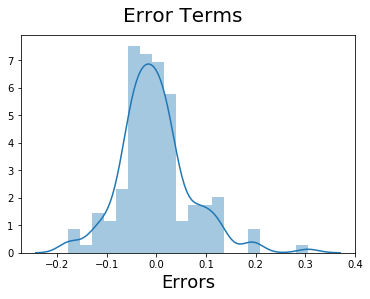

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions on Test Set

In [75]:
num_vars= ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [76]:
y_test = df_test.pop('price')
X_test = df_test

In [77]:
X_test_new = X_test[X_train10.columns]

In [78]:
# Making predictions
y_pred = lm10.predict(X_test_new)

## Calculate the R-squared score on the test set

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8956236840895223